In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Analiza zbioru danych

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df[['pclass', 'age', 'sibsp', 'parch', 'fare','survived']].describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [5]:
df.drop(['body', 'boat'], inplace=True, axis=1)

In [6]:
missing = pd.concat([df.isnull().sum(), df.isnull().sum()/df.shape[0]*100], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
pclass,0,0.000000
survived,0,0.000000
name,0,0.000000
sex,0,0.000000
age,263,20.091673
sibsp,0,0.000000
parch,0,0.000000
ticket,0,0.000000
fare,1,0.076394
cabin,1014,77.463713


In [7]:
df.drop(missing[missing['Percent']>25].index, axis=1, inplace=True)

## Feature engineering and data preprocessing

In [8]:
missing[(missing['Percent']<=25 )& (missing['Total']>0)]

,Total,Percent
age,263,20.091673
fare,1,0.076394
embarked,2,0.152788


In [9]:
df['title'] = df['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [10]:
age_info = pd.concat([ df.groupby('title')['age'].agg(['mean', 'min', 'max', 'median', 'count']),
df.groupby('title')['title'].value_counts()], axis=1)
age_info.columns = ['mean', 'min', 'max', 'median', 'count not empty', 'title_count']
age_info

,mean,min,max,median,count not empty,title_count
title,,,,,,
Capt,70.000000,70.0000,70.0,70.0,1,1
Col,54.000000,47.0000,60.0,54.5,4,4
Don,40.000000,40.0000,40.0,40.0,1,1
Dona,39.000000,39.0000,39.0,39.0,1,1
Dr,43.571429,23.0000,54.0,49.0,7,8
Jonkheer,38.000000,38.0000,38.0,38.0,1,1
Lady,48.000000,48.0000,48.0,48.0,1,1
Major,48.500000,45.0000,52.0,48.5,2,2
Master,5.482704,0.3333,14.5,4.0,53,61


In [11]:
df['age'] = df['age'].fillna(df.groupby('title')['age'].transform('mean'))

In [12]:
df['fare'] = df['fare'].fillna(df.groupby('pclass')['fare'].transform('mean'))
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [13]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['age_range'] = pd.cut(df['age'], bins=[0, 6, 12, 18, df['age'].max()+1], labels=['Bobas', 'Dzieciak', 'Nastolatek', 'Dorosly'])
df['mpc'] = df['age']*df['pclass']

In [14]:
df['pclass'] = df['pclass'].astype('category')
df['survived'] = df['survived'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['sex'] = df['sex'].astype('category')
df['age_range'] = df['age_range'].astype('category')
df['title'] = df['title'].astype('category')
df['family_size'] = df['family_size'].astype('int')
df['mpc'] = df['mpc'].astype('float')
df['fare'] = df['fare'].astype('float')
df['age'] = df['age'].astype('float')


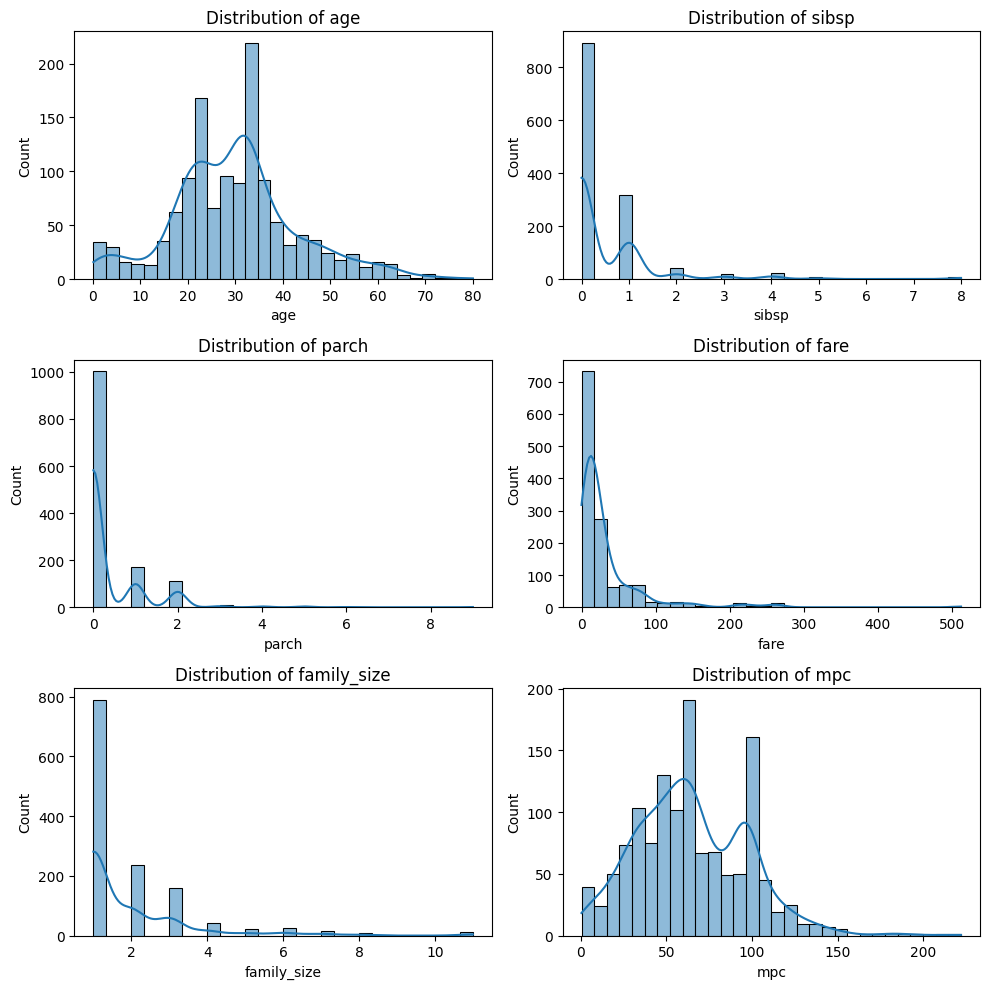

In [15]:
numeric_cols = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_cols)//2, ncols=2, figsize=(10, 10))
for i, column in enumerate(numeric_cols):
    row_idx = i // 2
    col_idx = i % 2
    sns.histplot(df[column], kde=True, ax=axes[row_idx, col_idx], bins=30)
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

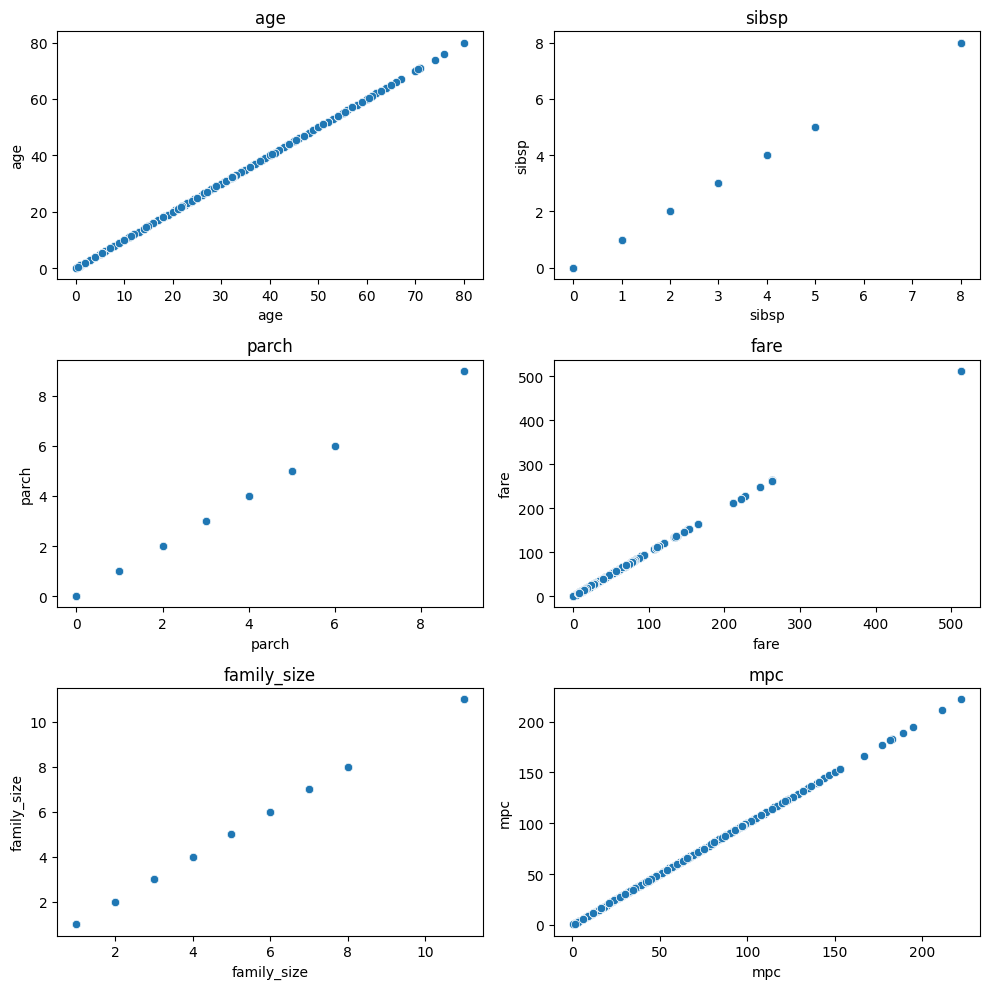

In [16]:
numeric_cols = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_cols)//2, ncols=2, figsize=(10, 10))
for i, column in enumerate(numeric_cols):
    row_idx = i // 2
    col_idx = i % 2
    sns.scatterplot(data=df, x=column, y=column, ax=axes[row_idx, col_idx])    
    axes[row_idx, col_idx].set_title(f'{column}')

plt.tight_layout()
plt.show()

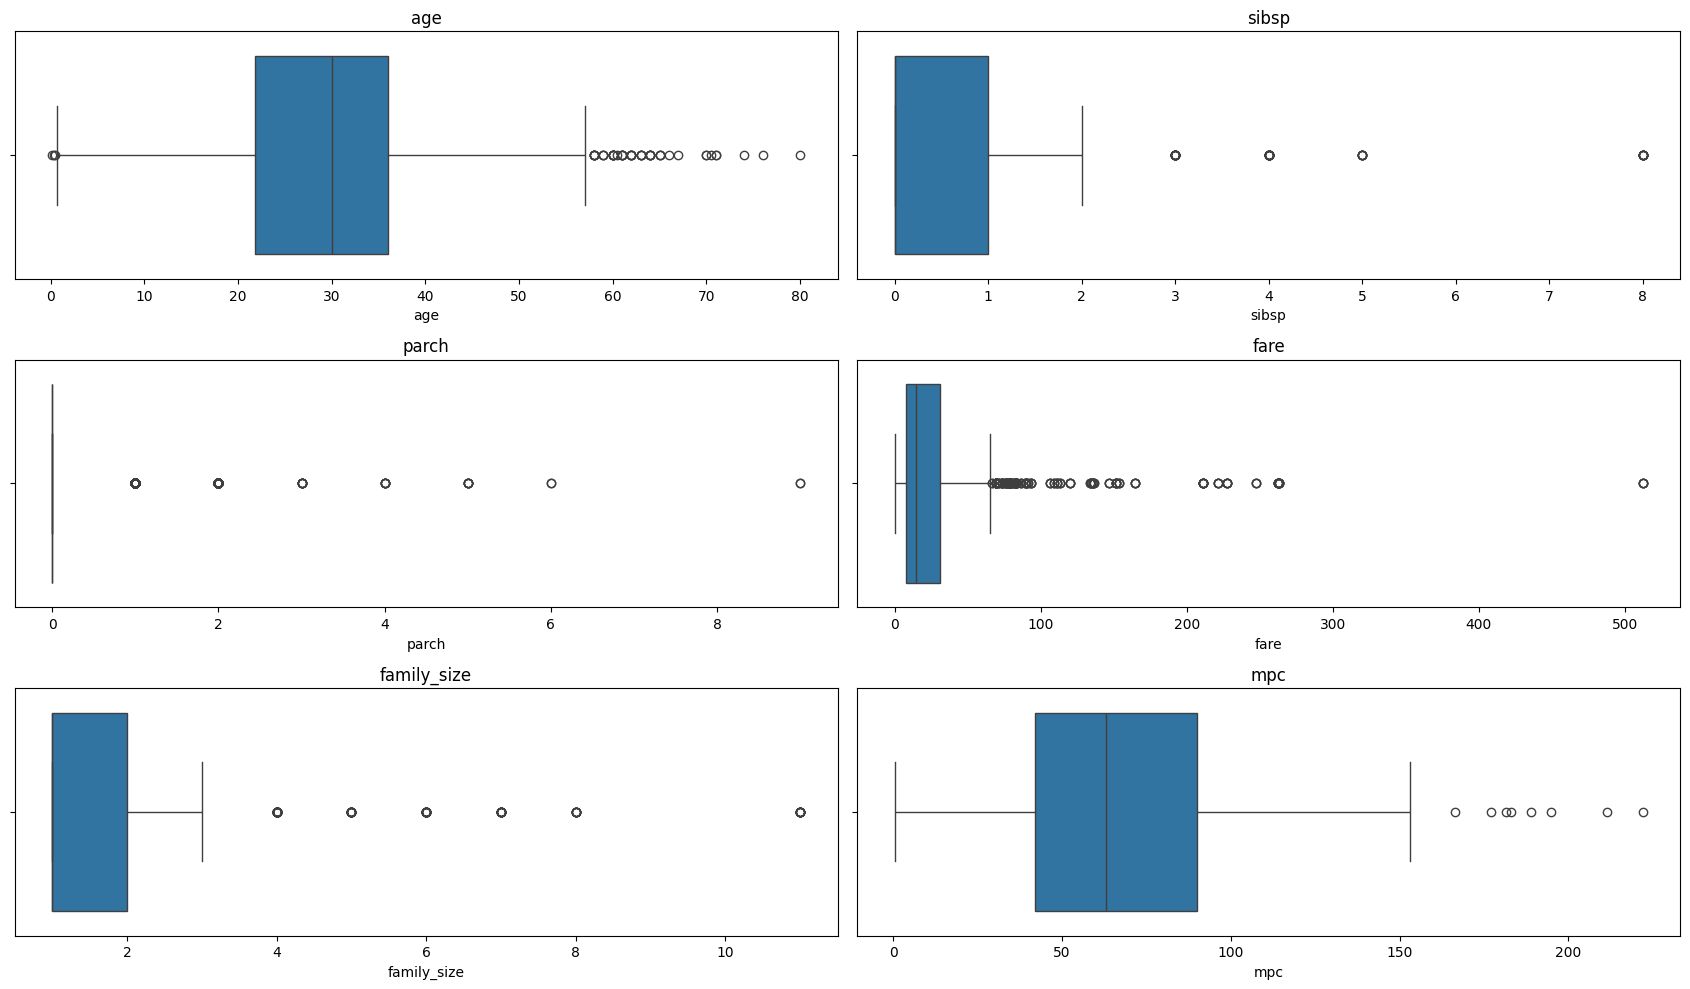

In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_cols)//2, ncols=2, figsize=(17, 10))
for i, column in enumerate(numeric_cols):
    row_idx = i // 2
    col_idx = i % 2
    sns.boxplot(x=df[column], orient='h',ax=axes[row_idx, col_idx])    
    axes[row_idx, col_idx].set_title(f'{column}')

plt.tight_layout()
plt.show()

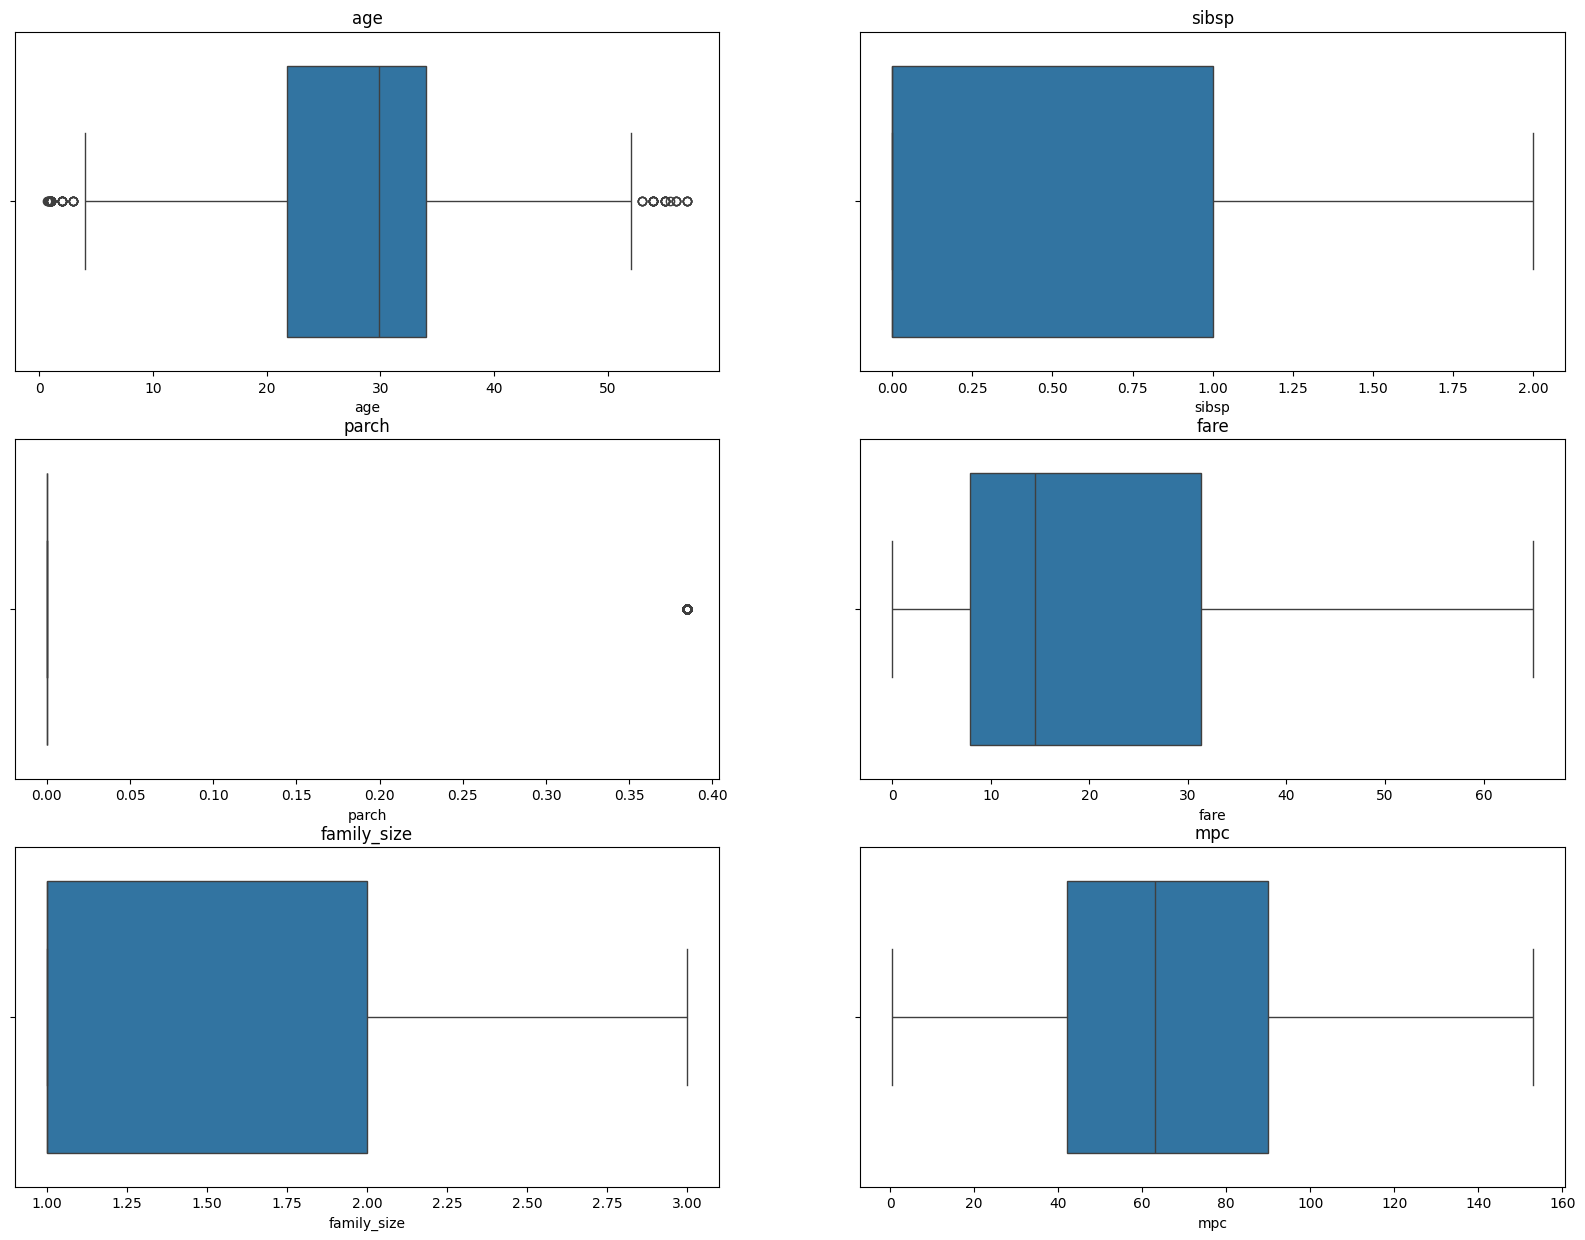

In [18]:
numeric_cols = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_cols)//2, ncols=2, figsize=(20, 15))
for i, column in enumerate(numeric_cols):
    row_idx = i // 2
    col_idx = i % 2
    Q1 = np.percentile(df[column], 25, method='midpoint')
    Q3 = np.percentile(df[column], 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3 +1.5*IQR
    lower = Q1 -1.5*IQR
    df[column] = np.where(df[column] > upper, df[column].mean(), df[column])
    df[column] = np.where(df[column] < lower, df[column].mean(), df[column])
    sns.boxplot(x=df[column], orient='h',ax=axes[row_idx, col_idx])    
    axes[row_idx, col_idx].set_title(f'{column}')


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for column in df.select_dtypes(include=['number']).columns:
    df[column] = scaler.fit_transform(df[[column]])

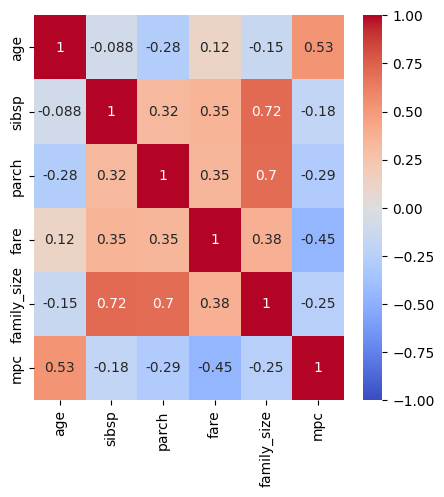

In [20]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [21]:
X = df.drop('survived', axis=1)
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
X[categorical_cols].nunique()

pclass        3
sex           2
embarked      3
title        18
age_range     4
dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([X, encoded_df], axis=1)
df_encoded.drop(categorical_cols, axis=1, inplace=True)
X=df_encoded

In [23]:
object_cols = X.select_dtypes(include=['object']).columns.tolist()
X[object_cols].nunique()

name      1307
ticket     929
dtype: int64

In [24]:
X['ticket'].unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '111427', '113054', 'PC 17591',
       '112379', 'PC 17610', '16966', '113050', '113798', 'PC 17476',
       'PC 17606', 'PC 17755', '695', '113059', '113760', '19924',
       '17770', 'W.E.P. 5734', '113806', '110152', 'PC 17594', '112051',
       '13508', '110465', '5727', 'PC 17756', '11770', '113791',
       'WE/P 5735', '112901', 'PC 17599', '113055', '113804',
       'F.C. 12750', '17474', '33638', 'PC 17761', '11755', 'PC 17485',
       'PC 17580', '11767', '36947', 'PC 17531', 'PC 17598', '17421',
       'PC 17474', '113051', '19950', '113778', 'PC 17611', '17765',
       '13568', '13567', '112058', '113803', '111320', '113503', '112378',
       'PC 17593

In [25]:
X.drop(['ticket', 'name'], axis=1, inplace=True)

# Klasyfikacja w zależności od zmiennych predykcyjnych 'sex', 'age', 'age_range', 'pclass', 'fare'

In [26]:
x = X[['sex_female', 'sex_male', 
       'age', 
       'age_range_Bobas', 'age_range_Dorosly', 'age_range_Dzieciak', 'age_range_Nastolatek',
       'pclass_1', 'pclass_2', 'pclass_3',
       'fare'
]]

In [27]:
from sklearn.model_selection import train_test_split
y = df['survived']
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1047, 11), (1047,), (262, 11), (262,))

## Klasyfikatory

### Regresja logistyczna

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, x_test)
y_pred = logistic_regression.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.816793893129771


### Drzewa decyzyjne

In [29]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, x_test)
y_pred_clf = clf.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_clf))

Accuracy:  0.7938931297709924


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, x_test)
y_pred_rfc = rfc.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_rfc))

Accuracy:  0.7748091603053435


### Support Vector Machine

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, x_test)
y_pred_svc = svc.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_svc))

Accuracy:  0.8320610687022901


### K-Nearest Neighbors (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, x_test)
y_pred_knn = knn.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))

Accuracy:  0.8358778625954199


### Gaussian Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, x_test)
y_pred_nb = nb.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_nb))

Accuracy:  0.7900763358778626


### XGBClssifier

In [34]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, x_test)
y_pred_xgb = xgb.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_xgb))

Accuracy:  0.7977099236641222


### CatBoostClassifier

In [35]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(x_train, x_test)
y_pred_cat = cat.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_cat))

Learning rate set to 0.010506
0:	learn: 0.6869864	total: 48.2ms	remaining: 48.2s
1:	learn: 0.6808357	total: 49.3ms	remaining: 24.6s
2:	learn: 0.6748445	total: 50.1ms	remaining: 16.7s
3:	learn: 0.6696458	total: 50.6ms	remaining: 12.6s
4:	learn: 0.6647056	total: 51.1ms	remaining: 10.2s
5:	learn: 0.6591598	total: 51.8ms	remaining: 8.58s
6:	learn: 0.6556031	total: 52.2ms	remaining: 7.4s
7:	learn: 0.6506818	total: 53ms	remaining: 6.57s
8:	learn: 0.6453024	total: 53.8ms	remaining: 5.93s
9:	learn: 0.6399710	total: 54.5ms	remaining: 5.39s
10:	learn: 0.6355008	total: 55ms	remaining: 4.95s
11:	learn: 0.6316561	total: 55.4ms	remaining: 4.56s
12:	learn: 0.6271112	total: 56.1ms	remaining: 4.26s
13:	learn: 0.6228467	total: 57ms	remaining: 4.01s
14:	learn: 0.6189638	total: 57.6ms	remaining: 3.78s
15:	learn: 0.6145782	total: 58.4ms	remaining: 3.59s
16:	learn: 0.6105144	total: 59.2ms	remaining: 3.42s
17:	learn: 0.6062077	total: 60ms	remaining: 3.27s
18:	learn: 0.6021600	total: 60.9ms	remaining: 3.14s
1

### ADABoostClassifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, x_test)
y_pred_ada = ada.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_ada))

Accuracy:  0.816793893129771


### Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, x_test)
y_pred_gb = gb.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_gb))

Accuracy:  0.8320610687022901


### Gaussian Process Classifier

In [38]:
from sklearn.gaussian_process import GaussianProcessClassifier
gp = GaussianProcessClassifier()
gp.fit(x_train, x_test)
y_pred_gp = gp.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_gp))

Accuracy:  0.8358778625954199


### Multi-layer Perceptron classifier

In [39]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(x_train, x_test)
y_pred_nn = nn.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_nn))

Accuracy:  0.8358778625954199


### SGDClassifier

In [40]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, x_test)
y_pred_sgd = sgd.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_sgd))

Accuracy:  0.8015267175572519


## Porównanie klasyfikatorów

In [41]:
classifiers = [
    {'LogisticRegression': logistic_regression, 'y': y_pred},
    {'DecisionTreeClassifier': clf, 'y': y_pred_clf},
    {'RandomForestClassifier': rfc, 'y': y_pred_rfc},
    {'SVC': svc, 'y': y_pred_svc},
    {'KNeighborsClassifier': knn, 'y': y_pred_knn},
    {'GaussianNB': nb, 'y': y_pred_nb},
    {'XGBClassifier': xgb, 'y': y_pred_xgb},
    {'CatBoostClassifier': cat, 'y': y_pred_cat},
    {'AdaBoostClassifier': ada, 'y': y_pred_ada},
    {'GradientBoostingClassifier': gb, 'y': y_pred_gb},
    {'GaussianProcessClassifier': gp, 'y': y_pred_gp},
    {'MLPClassifier': nn, 'y': y_pred_nn},
    {'SGDClassifier': sgd, 'y': y_pred_sgd}
]

### Macierz pomyłek

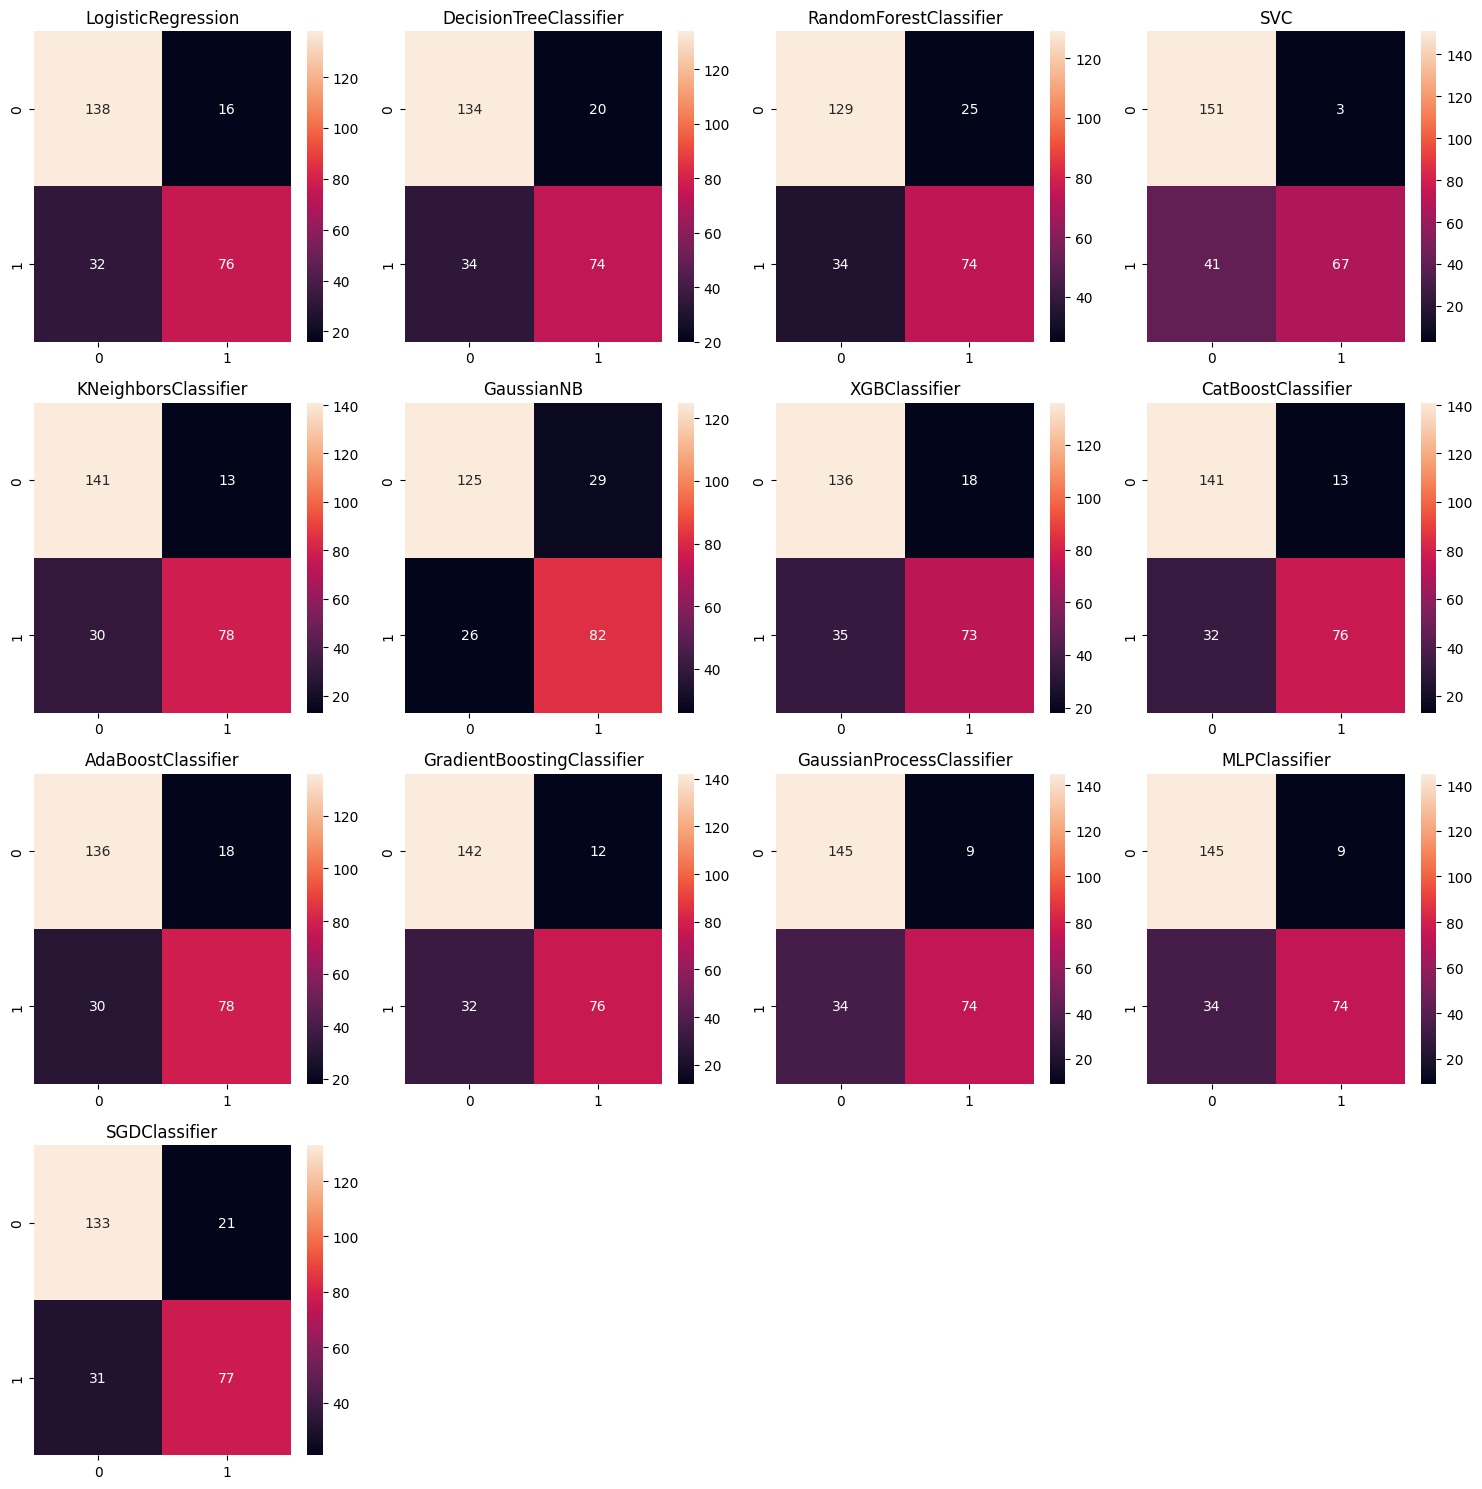

In [42]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15),squeeze=False)
for i, classifier in enumerate(classifiers):
    row_idx = i // 4
    col_idx = i % 4
    cm = confusion_matrix(y_test, classifier['y'])

    sns.heatmap(cm, annot=True, fmt='g', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(list(classifier.keys())[0])
for i in range(len(classifiers), 16):
    row_idx = i // 4
    col_idx = i % 4
    fig.delaxes(axes[row_idx, col_idx])
plt.tight_layout()
plt.show()

### Metryki

In [43]:
reports = []
for classifier in classifiers:
    report = pd.DataFrame(classification_report(y_test, classifier['y'], output_dict=True))
    reports.append(report)
reports = pd.concat(reports, keys=[list(classifier.keys())[0] for classifier in classifiers])
reports

0           1  accuracy  \
LogisticRegression         precision    0.811765    0.826087  0.816794   
                           recall       0.896104    0.703704  0.816794   
                           f1-score     0.851852    0.760000  0.816794   
                           support    154.000000  108.000000  0.816794   
DecisionTreeClassifier     precision    0.797619    0.787234  0.793893   
                           recall       0.870130    0.685185  0.793893   
                           f1-score     0.832298    0.732673  0.793893   
                           support    154.000000  108.000000  0.793893   
RandomForestClassifier     precision    0.791411    0.747475  0.774809   
                           recall       0.837662    0.685185  0.774809   
                           f1-score     0.813880    0.714976  0.774809   
                           support    154.000000  108.000000  0.774809   
SVC                        precision    0.786458    0.957143  0.832061   
                           recall       0.980519    0.620370  0.832061   
                           f1-score     0.872832    0.752809  0.832061   
                           support    154.000000  108.000000  0.832061   
KNeighborsClassifier       precision    0.824561    0.857143  0.835878   
                           recall       0.915584    0.722222  0.835878   
                           f1-score     0.867692    0.783920  0.835878   
                           support    154.000000  108.000000  0.835878   
GaussianNB                 precision    0.827815    0.738739  0.790076   
                           recall       0.811688    0.759259  0.790076   
                           f1-score     0.819672    0.748858  0.790076   
                           support    154.000000  108.000000  0.790076   
XGBClassifier              precision    0.795322    0.802198  0.797710   
                           recall       0.883117    0.675926  0.797710   
                           f1-score     0.836923    0.733668  0.797710   
                           support    154.000000  108.000000  0.797710   
CatBoostClassifier         precision    0.815029    0.853933  0.828244   
                           recall       0.915584    0.703704  0.828244   
                           f1-score     0.862385    0.771574  0.828244   
                           support    154.000000  108.000000  0.828244   
AdaBoostClassifier         precision    0.819277    0.812500  0.816794   
                           recall       0.883117    0.722222  0.816794   
                           f1-score     0.850000    0.764706  0.816794   
                           support    154.000000  108.000000  0.816794   
GradientBoostingClassifier precision    0.816092    0.863636  0.832061   
                           recall       0.922078    0.703704  0.832061   
                           f1-score     0.865854    0.775510  0.832061   
                           support    154.000000  108.000000  0.832061   
GaussianProcessClassifier  precision    0.810056    0.891566  0.835878   
                           recall       0.941558    0.685185  0.835878   
                           f1-score     0.870871    0.774869  0.835878   
                           support    154.000000  108.000000  0.835878   
MLPClassifier              precision    0.810056    0.891566  0.835878   
                           recall       0.941558    0.685185  0.835878   
                           f1-score     0.870871    0.774869  0.835878   
                           support    154.000000  108.000000  0.835878   
SGDClassifier              precision    0.810976    0.785714  0.801527   
                           recall       0.863636    0.712963  0.801527   
                           f1-score     0.836478    0.747573  0.801527   
                           support    154.000000  108.000000  0.801527   

                                       macro avg  weighted avg  
LogisticRegression         precision    0.818926      0.817

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

metrics_count = []
for classifier in classifiers:
    metrics_count.append([
        accuracy_score(y_test, classifier['y']),
        precision_score(y_test, classifier['y']),
        recall_score(y_test, classifier['y']),
        f1_score(y_test, classifier['y'])
    ])

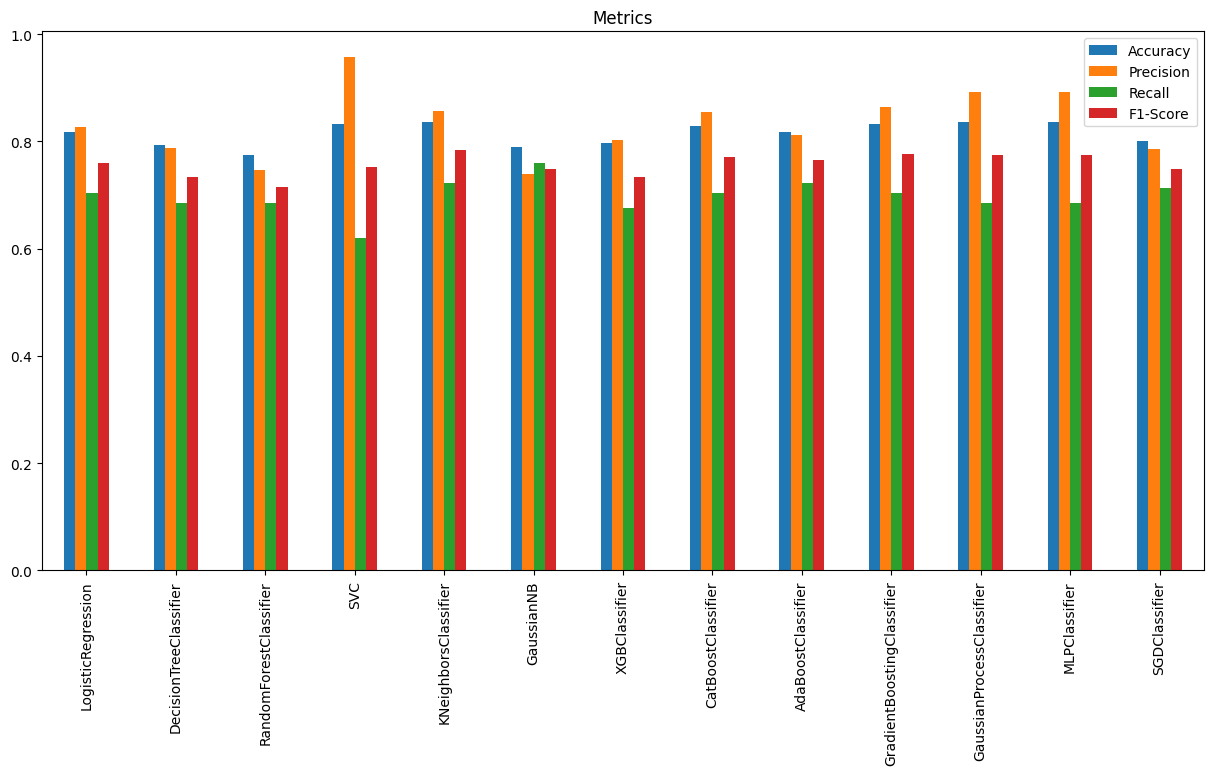

In [45]:
metrics_df = pd.DataFrame(metrics_count, columns=metrics, index=[list(classifier.keys())[0] for classifier in classifiers])
metrics_df.plot.bar(figsize=(15, 7))
plt.title('Metrics')
plt.show()

In [46]:
metrics_df


,Accuracy,Precision,Recall,F1-Score
LogisticRegression,0.816794,0.826087,0.703704,0.760000
DecisionTreeClassifier,0.793893,0.787234,0.685185,0.732673
RandomForestClassifier,0.774809,0.747475,0.685185,0.714976
SVC,0.832061,0.957143,0.620370,0.752809
KNeighborsClassifier,0.835878,0.857143,0.722222,0.783920
GaussianNB,0.790076,0.738739,0.759259,0.748858
XGBClassifier,0.797710,0.802198,0.675926,0.733668
CatBoostClassifier,0.828244,0.853933,0.703704,0.771574
AdaBoostClassifier,0.816794,0.812500,0.722222,0.764706
GradientBoostingClassifier,0.832061,0.863636,0.703704,0.775510


In [47]:
metrics_df1 = metrics_df

### ROC curve

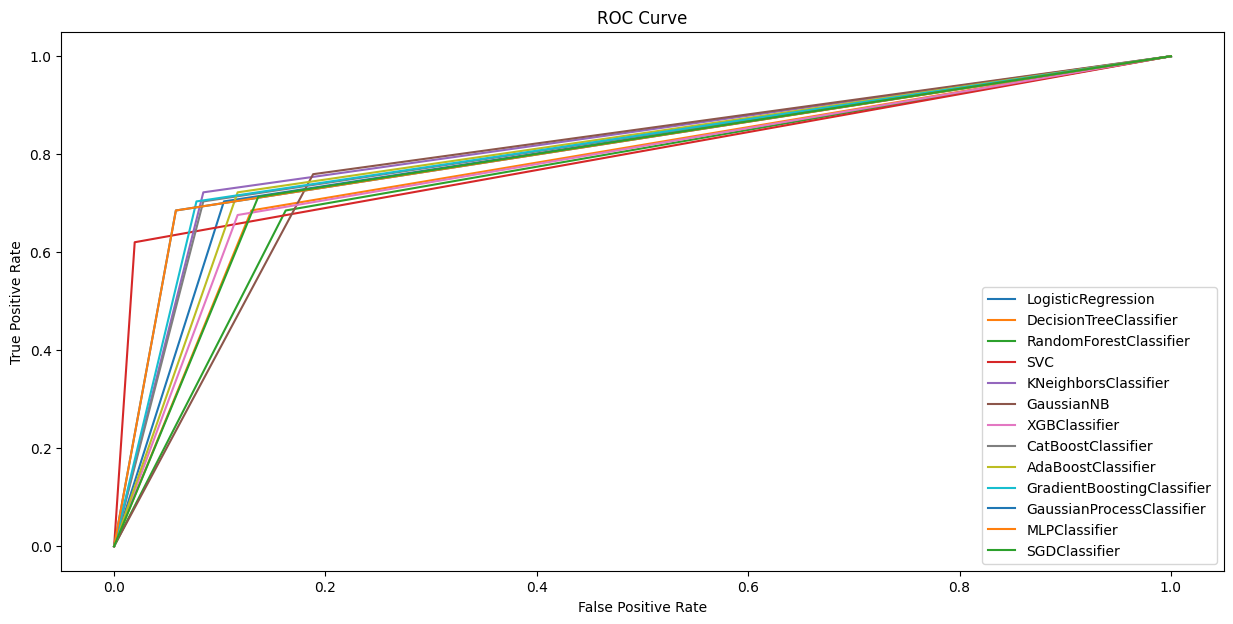

In [48]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(15, 7))
for classifier in classifiers:
    fpr, tpr, _ = roc_curve(y_test, classifier['y'])
    plt.plot(fpr, tpr, label=list(classifier.keys())[0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
plt.show()

# Klasyfikacja w zależności od zmiennych predykcyjnych 'sex', 'age', 'age_range', 'pclass', 'fare', 'title', 'family_size'

In [49]:
x = X[['sex_female', 'sex_male', 
       'age', 
       'age_range_Bobas', 'age_range_Dorosly', 'age_range_Dzieciak', 'age_range_Nastolatek',
       'pclass_1', 'pclass_2', 'pclass_3',
       'fare',
       'title_Capt', 'title_Col', 'title_Don', 'title_Dona', 'title_Dr', 'title_Jonkheer', 'title_Lady', 'title_Major',  'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme', 'title_Mr',
       'title_Mrs', 'title_Ms', 'title_Rev', 'title_Sir', 'title_the Countess',
       'family_size'
]]

In [50]:
from sklearn.model_selection import train_test_split
y = df['survived']
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1047, 30), (1047,), (262, 30), (262,))

## Klasyfikatory

### Regresja logistyczna

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, x_test)
y_pred = logistic_regression.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.816793893129771


### Drzewa decyzyjne

In [52]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, x_test)
y_pred_clf = clf.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_clf))

Accuracy:  0.8015267175572519


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, x_test)
y_pred_rfc = rfc.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_rfc))

Accuracy:  0.8053435114503816


### Support Vector Machine

In [54]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, x_test)
y_pred_svc = svc.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_svc))

Accuracy:  0.8129770992366412


### K-Nearest Neighbors (KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, x_test)
y_pred_knn = knn.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))

Accuracy:  0.8320610687022901


### Gaussian Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, x_test)
y_pred_nb = nb.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_nb))

Accuracy:  0.7213740458015268


### XGBClssifier

In [57]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, x_test)
y_pred_xgb = xgb.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_xgb))

Accuracy:  0.8053435114503816


### CatBoostClassifier

In [58]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(x_train, x_test)
y_pred_cat = cat.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_cat))

Learning rate set to 0.010506
0:	learn: 0.6872923	total: 1.73ms	remaining: 1.73s
1:	learn: 0.6812658	total: 2.43ms	remaining: 1.21s
2:	learn: 0.6758105	total: 3.12ms	remaining: 1.04s
3:	learn: 0.6710831	total: 3.71ms	remaining: 923ms
4:	learn: 0.6647786	total: 4.38ms	remaining: 872ms
5:	learn: 0.6591570	total: 5.06ms	remaining: 839ms
6:	learn: 0.6535846	total: 5.76ms	remaining: 817ms
7:	learn: 0.6479269	total: 6.42ms	remaining: 796ms
8:	learn: 0.6435725	total: 6.89ms	remaining: 759ms
9:	learn: 0.6385162	total: 7.57ms	remaining: 749ms
10:	learn: 0.6330399	total: 8.31ms	remaining: 748ms
11:	learn: 0.6282663	total: 9.06ms	remaining: 746ms
12:	learn: 0.6238486	total: 9.79ms	remaining: 743ms
13:	learn: 0.6191476	total: 10.6ms	remaining: 743ms
14:	learn: 0.6144355	total: 11.3ms	remaining: 743ms
15:	learn: 0.6098004	total: 12.1ms	remaining: 743ms
16:	learn: 0.6051311	total: 12.9ms	remaining: 745ms
17:	learn: 0.6007433	total: 13.7ms	remaining: 748ms
18:	learn: 0.5969535	total: 14.5ms	remaining

### ADABoostClassifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, x_test)
y_pred_ada = ada.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_ada))

Accuracy:  0.8320610687022901


### Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, x_test)
y_pred_gb = gb.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_gb))

Accuracy:  0.8206106870229007


### Gaussian Process Classifier

In [61]:
from sklearn.gaussian_process import GaussianProcessClassifier
gp = GaussianProcessClassifier()
gp.fit(x_train, x_test)
y_pred_gp = gp.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_gp))

Accuracy:  0.8129770992366412


### Multi-layer Perceptron classifier

In [62]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(x_train, x_test)
y_pred_nn = nn.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_nn))

Accuracy:  0.8320610687022901


### SGDClassifier

In [63]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, x_test)
y_pred_sgd = sgd.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_sgd))

Accuracy:  0.7442748091603053


## Porównanie klasyfikatorów

In [64]:
classifiers = [
    {'LogisticRegression': logistic_regression, 'y': y_pred},
    {'DecisionTreeClassifier': clf, 'y': y_pred_clf},
    {'RandomForestClassifier': rfc, 'y': y_pred_rfc},
    {'SVC': svc, 'y': y_pred_svc},
    {'KNeighborsClassifier': knn, 'y': y_pred_knn},
    {'GaussianNB': nb, 'y': y_pred_nb},
    {'XGBClassifier': xgb, 'y': y_pred_xgb},
    {'CatBoostClassifier': cat, 'y': y_pred_cat},
    {'AdaBoostClassifier': ada, 'y': y_pred_ada},
    {'GradientBoostingClassifier': gb, 'y': y_pred_gb},
    {'GaussianProcessClassifier': gp, 'y': y_pred_gp},
    {'MLPClassifier': nn, 'y': y_pred_nn},
    {'SGDClassifier': sgd, 'y': y_pred_sgd}
]

### Macierz pomyłek

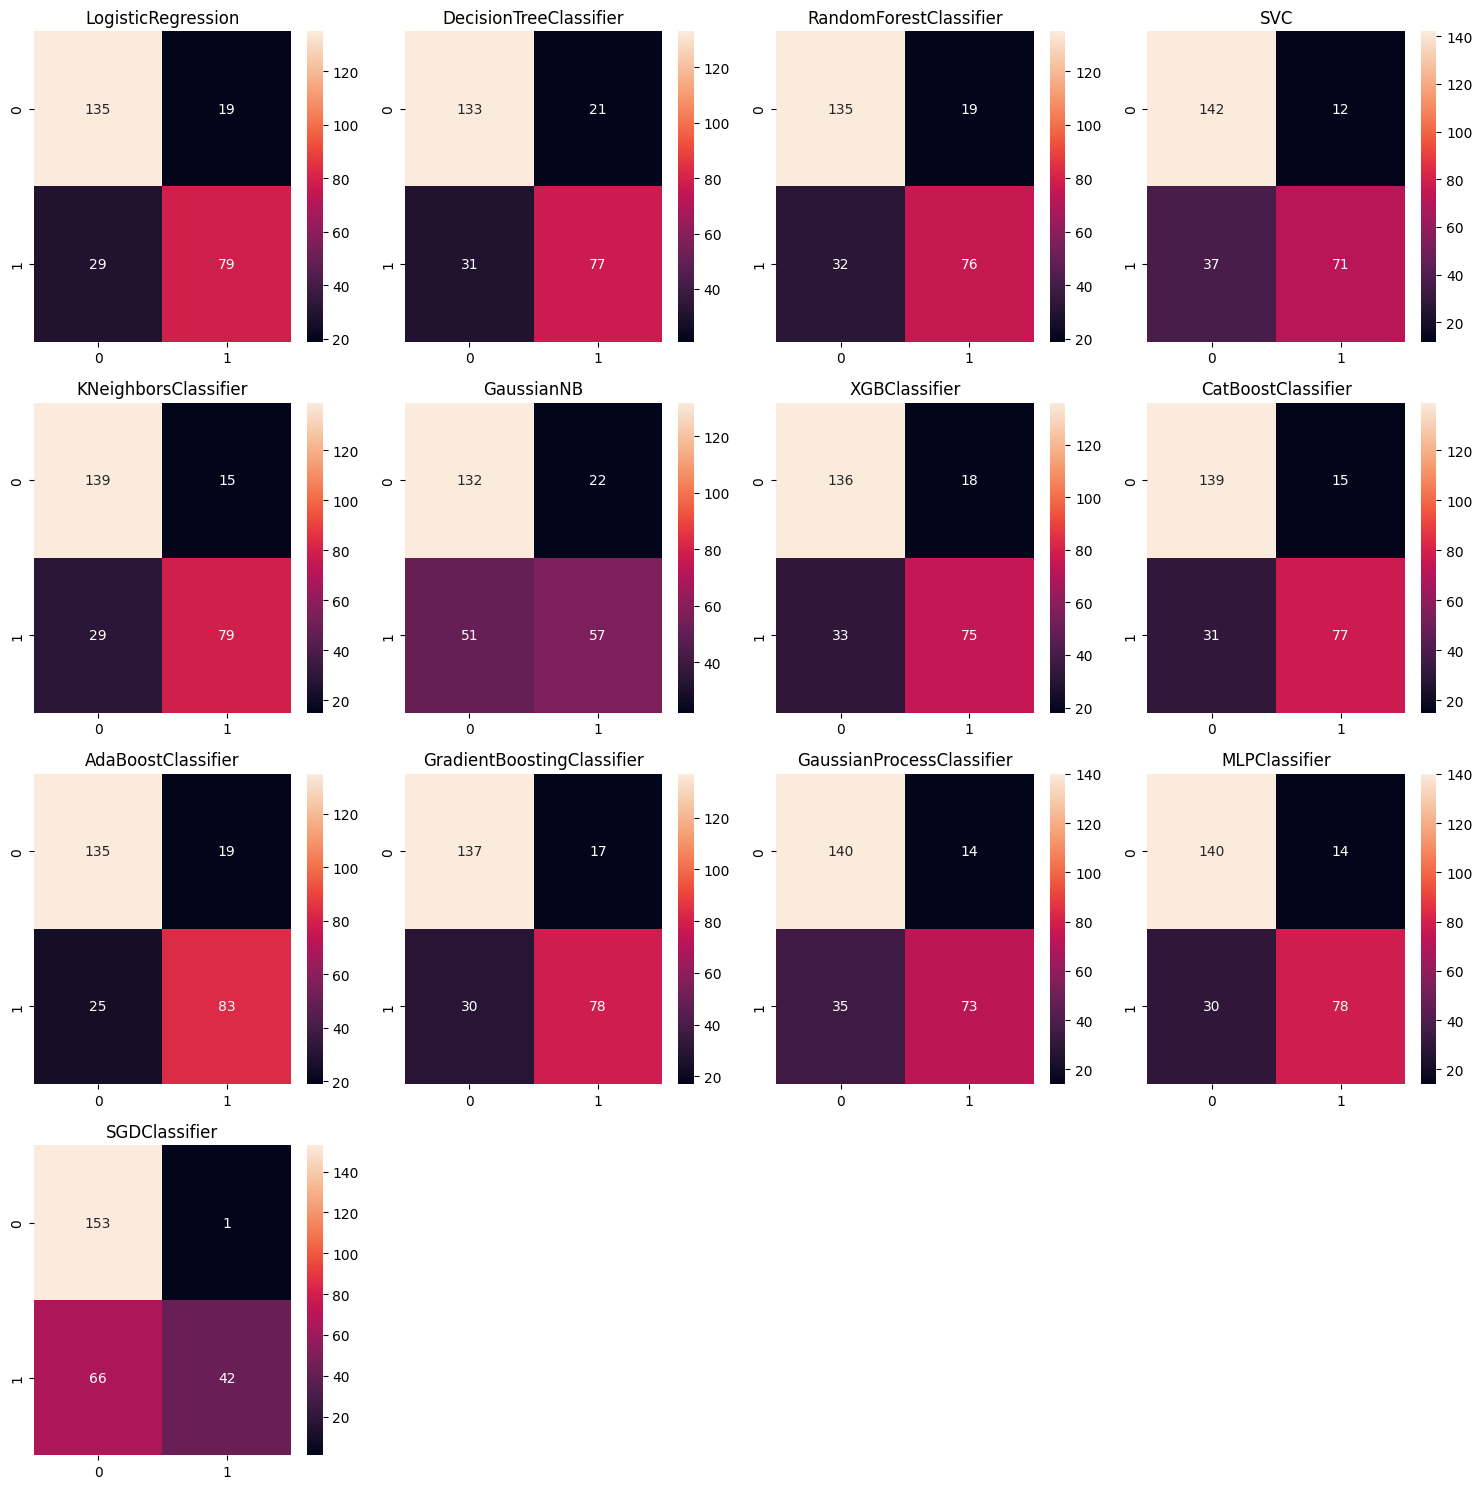

In [65]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15),squeeze=False)
for i, classifier in enumerate(classifiers):
    row_idx = i // 4
    col_idx = i % 4
    cm = confusion_matrix(y_test, classifier['y'])

    sns.heatmap(cm, annot=True, fmt='g', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(list(classifier.keys())[0])
for i in range(len(classifiers), 16):
    row_idx = i // 4
    col_idx = i % 4
    fig.delaxes(axes[row_idx, col_idx])
plt.tight_layout()
plt.show()

### Metryki

In [66]:
reports = []
for classifier in classifiers:
    report = pd.DataFrame(classification_report(y_test, classifier['y'], output_dict=True))
    reports.append(report)
reports = pd.concat(reports, keys=[list(classifier.keys())[0] for classifier in classifiers])
reports

0           1  accuracy  \
LogisticRegression         precision    0.823171    0.806122  0.816794   
                           recall       0.876623    0.731481  0.816794   
                           f1-score     0.849057    0.766990  0.816794   
                           support    154.000000  108.000000  0.816794   
DecisionTreeClassifier     precision    0.810976    0.785714  0.801527   
                           recall       0.863636    0.712963  0.801527   
                           f1-score     0.836478    0.747573  0.801527   
                           support    154.000000  108.000000  0.801527   
RandomForestClassifier     precision    0.808383    0.800000  0.805344   
                           recall       0.876623    0.703704  0.805344   
                           f1-score     0.841121    0.748768  0.805344   
                           support    154.000000  108.000000  0.805344   
SVC                        precision    0.793296    0.855422  0.812977   
                           recall       0.922078    0.657407  0.812977   
                           f1-score     0.852853    0.743455  0.812977   
                           support    154.000000  108.000000  0.812977   
KNeighborsClassifier       precision    0.827381    0.840426  0.832061   
                           recall       0.902597    0.731481  0.832061   
                           f1-score     0.863354    0.782178  0.832061   
                           support    154.000000  108.000000  0.832061   
GaussianNB                 precision    0.721311    0.721519  0.721374   
                           recall       0.857143    0.527778  0.721374   
                           f1-score     0.783383    0.609626  0.721374   
                           support    154.000000  108.000000  0.721374   
XGBClassifier              precision    0.804734    0.806452  0.805344   
                           recall       0.883117    0.694444  0.805344   
                           f1-score     0.842105    0.746269  0.805344   
                           support    154.000000  108.000000  0.805344   
CatBoostClassifier         precision    0.817647    0.836957  0.824427   
                           recall       0.902597    0.712963  0.824427   
                           f1-score     0.858025    0.770000  0.824427   
                           support    154.000000  108.000000  0.824427   
AdaBoostClassifier         precision    0.843750    0.813725  0.832061   
                           recall       0.876623    0.768519  0.832061   
                           f1-score     0.859873    0.790476  0.832061   
                           support    154.000000  108.000000  0.832061   
GradientBoostingClassifier precision    0.820359    0.821053  0.820611   
                           recall       0.889610    0.722222  0.820611   
                           f1-score     0.853583    0.768473  0.820611   
                           support    154.000000  108.000000  0.820611   
GaussianProcessClassifier  precision    0.800000    0.839080  0.812977   
                           recall       0.909091    0.675926  0.812977   
                           f1-score     0.851064    0.748718  0.812977   
                           support    154.000000  108.000000  0.812977   
MLPClassifier              precision    0.823529    0.847826  0.832061   
                           recall       0.909091    0.722222  0.832061   
                           f1-score     0.864198    0.780000  0.832061   
                           support    154.000000  108.000000  0.832061   
SGDClassifier              precision    0.698630    0.976744  0.744275   
                           recall       0.993506    0.388889  0.744275   
                           f1-score     0.820375    0.556291  0.744275   
                           support    154.000000  108.000000  0.744275   

                                       macro avg  weighted avg  
LogisticRegression         precision    0.814647      0.816

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

metrics_count = []
for classifier in classifiers:
    metrics_count.append([
        accuracy_score(y_test, classifier['y']),
        precision_score(y_test, classifier['y']),
        recall_score(y_test, classifier['y']),
        f1_score(y_test, classifier['y'])
    ])

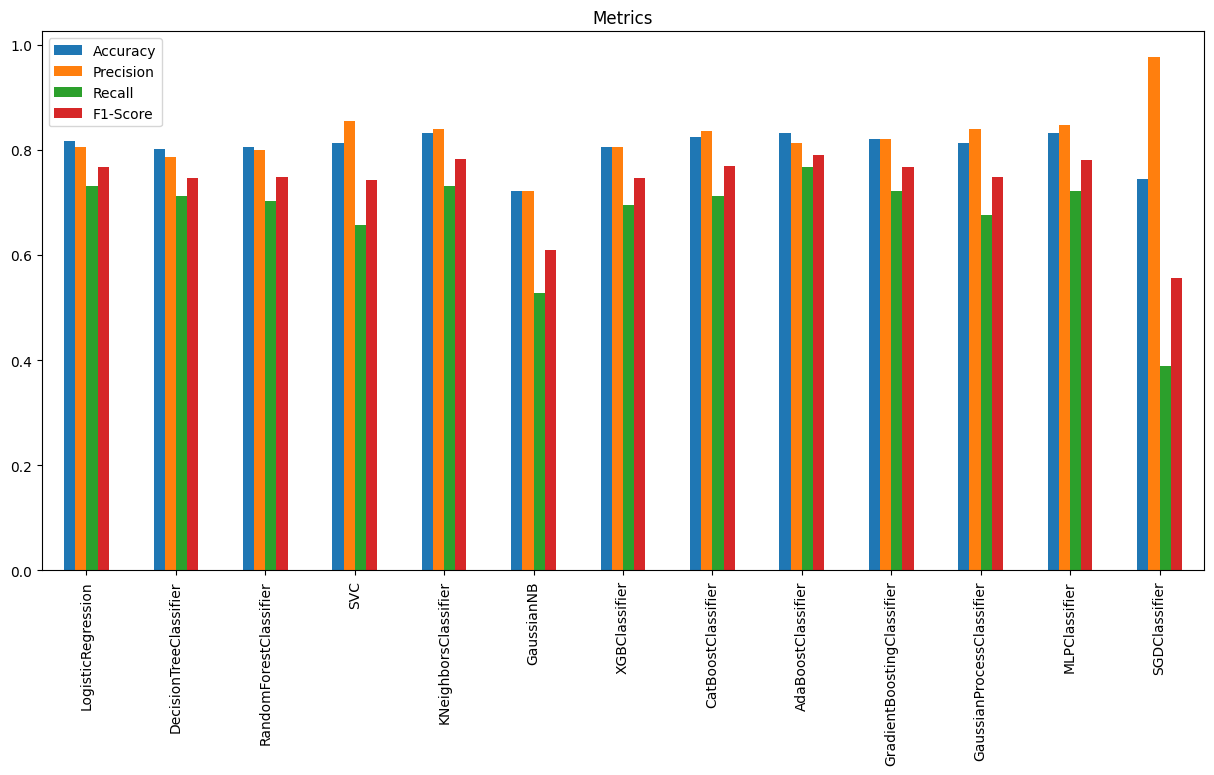

In [68]:
metrics_df = pd.DataFrame(metrics_count, columns=metrics, index=[list(classifier.keys())[0] for classifier in classifiers])
metrics_df.plot.bar(figsize=(15, 7))
plt.title('Metrics')
plt.show()

In [69]:
metrics_df


,Accuracy,Precision,Recall,F1-Score
LogisticRegression,0.816794,0.806122,0.731481,0.766990
DecisionTreeClassifier,0.801527,0.785714,0.712963,0.747573
RandomForestClassifier,0.805344,0.800000,0.703704,0.748768
SVC,0.812977,0.855422,0.657407,0.743455
KNeighborsClassifier,0.832061,0.840426,0.731481,0.782178
GaussianNB,0.721374,0.721519,0.527778,0.609626
XGBClassifier,0.805344,0.806452,0.694444,0.746269
CatBoostClassifier,0.824427,0.836957,0.712963,0.770000
AdaBoostClassifier,0.832061,0.813725,0.768519,0.790476
GradientBoostingClassifier,0.820611,0.821053,0.722222,0.768473


In [70]:
metrics_df2 = metrics_df

### ROC curve

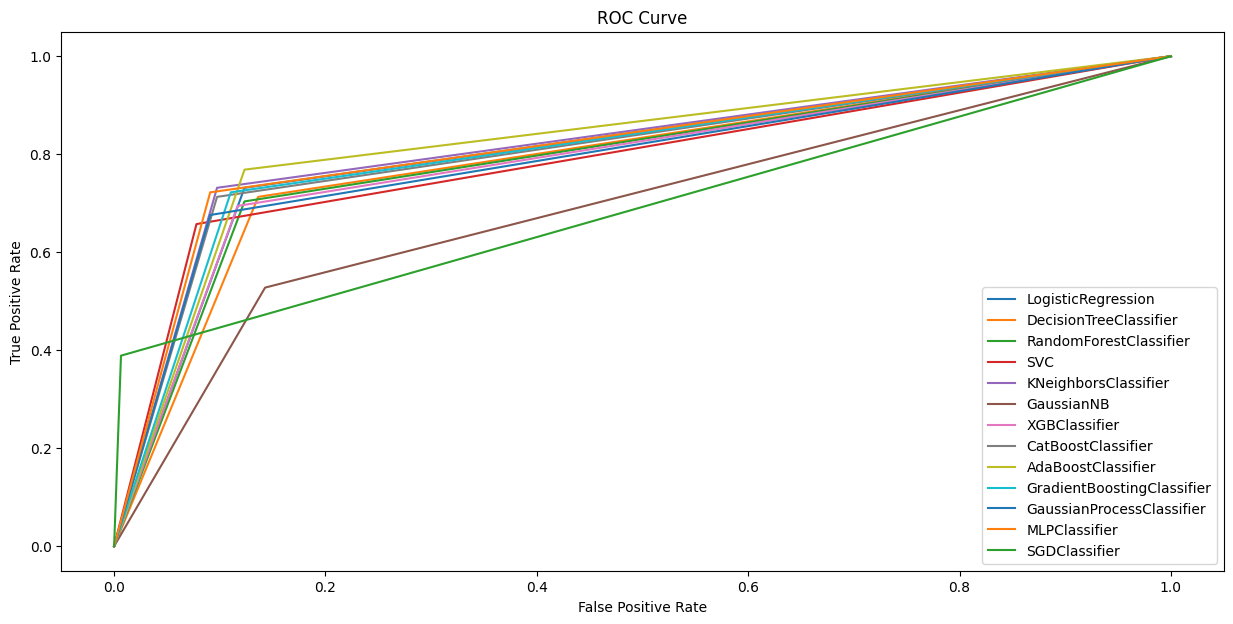

In [71]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(15, 7))
for classifier in classifiers:
    fpr, tpr, _ = roc_curve(y_test, classifier['y'])
    plt.plot(fpr, tpr, label=list(classifier.keys())[0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
plt.show()

# Porównanie klasyfikatorów dla różnych zestawów zmiennych predykcyjnych

'_1' dla klasyfikatorów zależnych od zmiennych predykcyjnych 'sex', 'age', 'age_range', 'pclass', 'fare'

'_2' dla klasyfikatorów zależnych od zmiennych predykcyjnych 'sex', 'age', 'age_range', 'pclass', 'fare', 
'title', 'family_size'

In [72]:
metrics_df1 = metrics_df1.add_suffix('_1')
metrics_df2 = metrics_df2.add_suffix('_2')
metric = pd.concat([metrics_df1, metrics_df2], axis=1)
metric

,Accuracy_1,Precision_1,Recall_1,F1-Score_1,Accuracy_2,Precision_2,Recall_2,F1-Score_2
LogisticRegression,0.816794,0.826087,0.703704,0.760000,0.816794,0.806122,0.731481,0.766990
DecisionTreeClassifier,0.793893,0.787234,0.685185,0.732673,0.801527,0.785714,0.712963,0.747573
RandomForestClassifier,0.774809,0.747475,0.685185,0.714976,0.805344,0.800000,0.703704,0.748768
SVC,0.832061,0.957143,0.620370,0.752809,0.812977,0.855422,0.657407,0.743455
KNeighborsClassifier,0.835878,0.857143,0.722222,0.783920,0.832061,0.840426,0.731481,0.782178
GaussianNB,0.790076,0.738739,0.759259,0.748858,0.721374,0.721519,0.527778,0.609626
XGBClassifier,0.797710,0.802198,0.675926,0.733668,0.805344,0.806452,0.694444,0.746269
CatBoostClassifier,0.828244,0.853933,0.703704,0.771574,0.824427,0.836957,0.712963,0.770000
AdaBoostClassifier,0.816794,0.812500,0.722222,0.764706,0.832061,0.813725,0.768519,0.790476
GradientBoostingClassifier,0.832061,0.863636,0.703704,0.775510,0.820611,0.821053,0.722222,0.768473
